In [1]:
# from https://merricx.github.io/qrazybox/
data_blocks = ["01000011","0001????","????????","????????","????????","????????","????????","????????","????????","????????","????????","????????","????????","????????","????????","????????","????????","????????","????????","????????","????????","????????","????????","????????","????????","????????","????????","????????","????????","????????","????????","????????","????????","????????","????????","????????","????????","???????1","01100011","01110011","10010111","10000111","00000110","01000110","01100011","01100110","11100111","00100111","01000110","11010010","11110000","00000001","01100011","11010000","10011100","10101011","00001101","10101011","01001100","11111001","11010011","00000011","10101110","10010111","00000101","10100010","10100111","01100110","10001101","10011011"]
data_bits = ''.join(data_blocks).replace('?', '0')[12:]
s = []
for i in range(0, len(data_bits), 8):
    s.append(int(data_bits[i:i+8], 2))
import hexdump
hexdump.hexdump(bytes(s))

00000000: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
00000010: 00 00 00 00 00 00 00 00  00 00 00 00 00 00 00 00  ................
00000020: 00 00 00 00 16 37 39 78  70 64 66 36 6E 72 74 6D  .....79xpdf6nrtm
00000030: 2F 00 16 3D 09 CA B0 DA  B4 CF 9D 30 3A E9 70 5A  /..=.......0:.pZ
00000040: 2A 76 68 D9 0B                                    *vh..


In [2]:
def binary_encode(l):
    return ''.join('{:0>8b}'.format(i) for i in l)
origin_bits = ''.join(data_blocks)
known_bits = '0100' # mode
known_bits += binary_encode([49]) # length
known_bits += binary_encode('https://sunaiku-foundation.com/'.encode())
known_bits = known_bits.ljust(len(origin_bits), '?')
print(known_bits)
assert(len(origin_bits) == len(known_bits))
fixed_data_bits = ''.join(o if k == '?' else k for o, k in zip(origin_bits, known_bits))
fixed_blocks = []
unknown_blocks = []
for i in range(0, len(fixed_data_bits), 8):
    block = fixed_data_bits[i:i+8]
    if '?' in block:
        unknown_blocks.append(i // 8)
        print(i // 8, block)
    fixed_blocks.append(int(block.replace('?', '0'), 2))

01000011000101101000011101000111010001110000011100110011101000101111001011110111001101110101011011100110000101101001011010110111010100101101011001100110111101110101011011100110010001100001011101000110100101101111011011100010111001100011011011110110110100101111????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????
32 1111????
33 ????????
34 ????????
35 ????????
36 ????????
37 ???????1


In [3]:
import reedsolo
from Crypto.Util.number import bytes_to_long, long_to_bytes
rs = reedsolo.RSCodec(15)
dec, _, pos = rs.decode(fixed_blocks, erase_pos=unknown_blocks)
shift = long_to_bytes(bytes_to_long(dec)<<4)
print(shift[2:51])

b'https://sunaiku-foundation.com/news/v79xpdf6nrtm/'


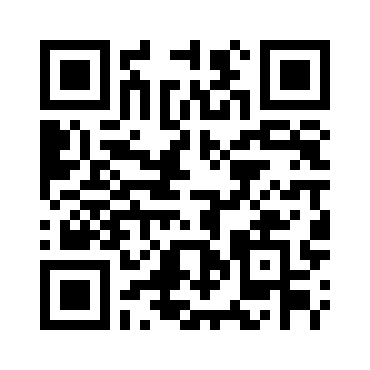

In [4]:
import qrcode
qr = qrcode.QRCode(
    version=3,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    mask_pattern=7
)
qr.add_data('https://sunaiku-foundation.com/news/v79xpdf6nrtm/')
qr.make(fit=True)
qr.make_image(fill_color="black", back_color="white")
